In [42]:
#import library/packages 
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Flatten

In [43]:
df = pd.read_csv('/content/imdb_master.csv', encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values 

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [44]:
#tokenizing data 
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [45]:
le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state = 1000) #traning data
X_train.shape,y_train.shape

((75000, 2000), (75000,))

1. The first mistake was that the input_dim variable had no number assigned.
2. Changing the second dense layer from 5 to 3.
3. Nothing else changed. The model runs fine. 


In [46]:
#number of features 
input_dim = 2000
model = Sequential()
model.add(layers.Dense(300, input_dim = input_dim,activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [47]:
model.summary() #getting the summary of my model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 300)               600300    
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 903       
Total params: 601,203
Trainable params: 601,203
Non-trainable params: 0
_________________________________________________________________


In [48]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 6s 20ms/step - loss: 0.9218 - acc: 0.4971 - val_loss: 0.8458 - val_acc: 0.5140
Epoch 2/5
293/293 [==============================] - 5s 19ms/step - loss: 0.7851 - acc: 0.5869 - val_loss: 0.8417 - val_acc: 0.5138
Epoch 3/5
293/293 [==============================] - 5s 18ms/step - loss: 0.6731 - acc: 0.6977 - val_loss: 0.8742 - val_acc: 0.5076
Epoch 4/5
293/293 [==============================] - 5s 19ms/step - loss: 0.4803 - acc: 0.8359 - val_loss: 0.9521 - val_acc: 0.5068
Epoch 5/5
293/293 [==============================] - 6s 19ms/step - loss: 0.2700 - acc: 0.9398 - val_loss: 1.0796 - val_acc: 0.5100


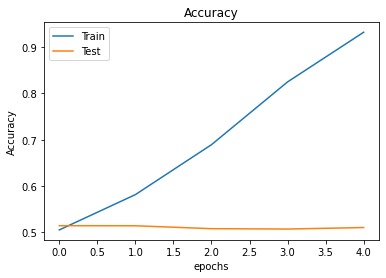

In [49]:
plt.figure()
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

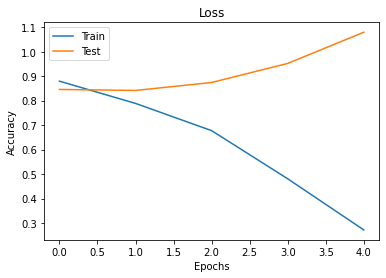

In [50]:
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()